In [1]:
from collections import OrderedDict
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
class Preprocess:
    
    def __init__(self, dataframe):
        self.dataframe = dataframe
    
    def features(self, datatype):
        d = {}
        for elem in self.dataframe.columns:
            if self.dataframe[elem].dtype == datatype:
                d[elem] = len(set(self.dataframe[elem]))
        return OrderedDict(sorted(d.items(), key=lambda t: t[1]))
    
    @staticmethod
    def not_missed(self, column):
        data = np.array(self.dataframe[column].isnull())
        j = 0
        for i in range(len(data)):
            if data[i] == True:
                j+=1
            else:
                j=j
        return 1-j/len(data)
    
    def freq_plot(self, features):
        frequencies = []
        for elem in features:
            completeness = not_missed(self.dataframe, elem)
            frequencies.append([elem, completeness])
        frequencies = np.array(frequencies)
        freq_df = pd.DataFrame(index=frequencies[:,0], data=frequencies[:,1], columns=["frequency"])
        sorted_freq = freq_df.frequency.sort_values(ascending=False)
        plt.figure(figsize=(20,10))
        sns.barplot(x=sorted_freq.index[0:49], y=sorted_freq[0:49].astype(np.float), palette="Blues_r")
        plt.xticks(rotation=90);
    
    def uniq_plot(self, features):
        unique_counts = self.dataframe.loc[:, features].nunique().sort_values()
        plt.figure(figsize=(20,10))
        sns.barplot(unique_counts.index, unique_counts.values, palette="Oranges_r")
        plt.xticks(rotation=90)
        plt.yscale("log");

In [3]:
dataframe = pd.read_excel("scoring_case.xlsx", sheet_name="Sheet1")

In [4]:
dataframe.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6797 entries, 0 to 6796
Data columns (total 122 columns):
SK_ID_CURR                      6797 non-null int64
TARGET                          5797 non-null float64
NAME_CONTRACT_TYPE              6797 non-null object
CODE_GENDER                     6797 non-null object
FLAG_OWN_CAR                    6797 non-null object
FLAG_OWN_REALTY                 6797 non-null object
CNT_CHILDREN                    6797 non-null int64
AMT_INCOME_TOTAL                6797 non-null float64
AMT_CREDIT                      6797 non-null float64
AMT_ANNUITY                     6797 non-null float64
AMT_GOODS_PRICE                 6793 non-null float64
NAME_TYPE_SUITE                 6769 non-null object
NAME_INCOME_TYPE                6797 non-null object
NAME_EDUCATION_TYPE             6797 non-null object
NAME_FAMILY_STATUS              6797 non-null object
NAME_HOUSING_TYPE               6797 non-null object
REGION_POPULATION_RELATIVE      6797 non-

In [5]:
known, predict = dataframe.iloc[0:5797], dataframe.iloc[5797:]

In [116]:
mypreprocessor = Preprocess(dataframe.drop(['SK_ID_CURR', 'TARGET'], axis=1))

In [117]:
obj_feat = mypreprocessor.features('object')
int_feat = mypreprocessor.features('int64')
float_feat = mypreprocessor.features('float64')

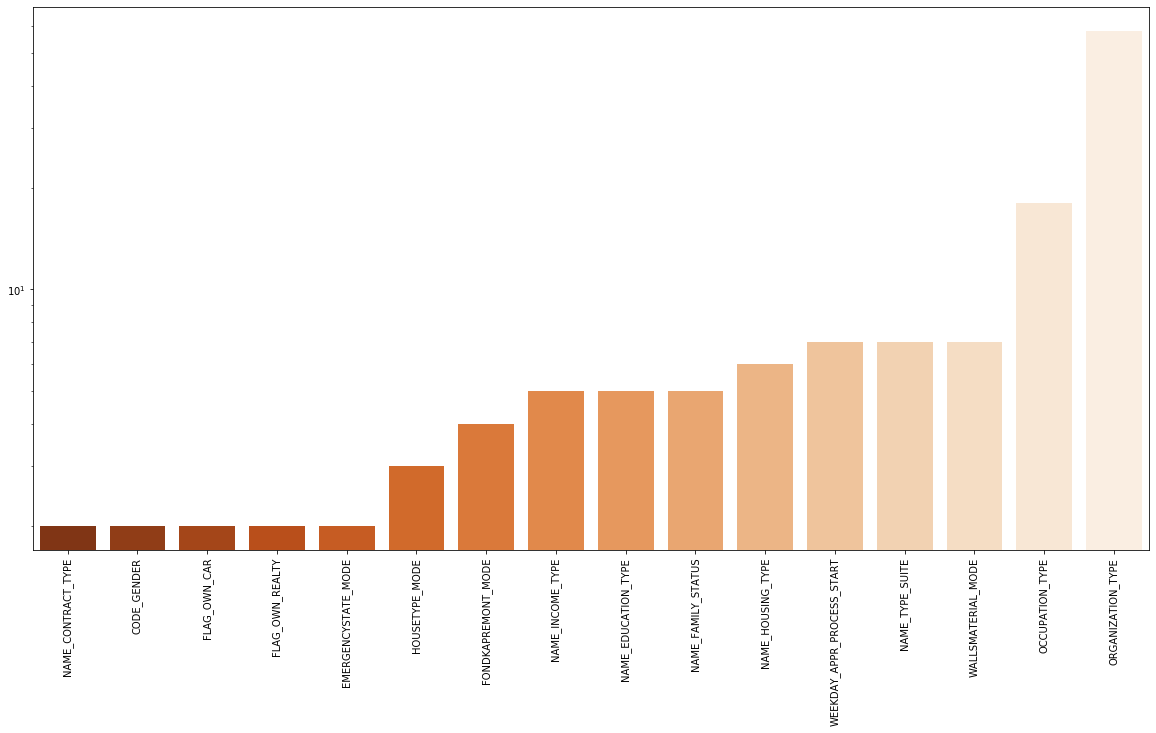

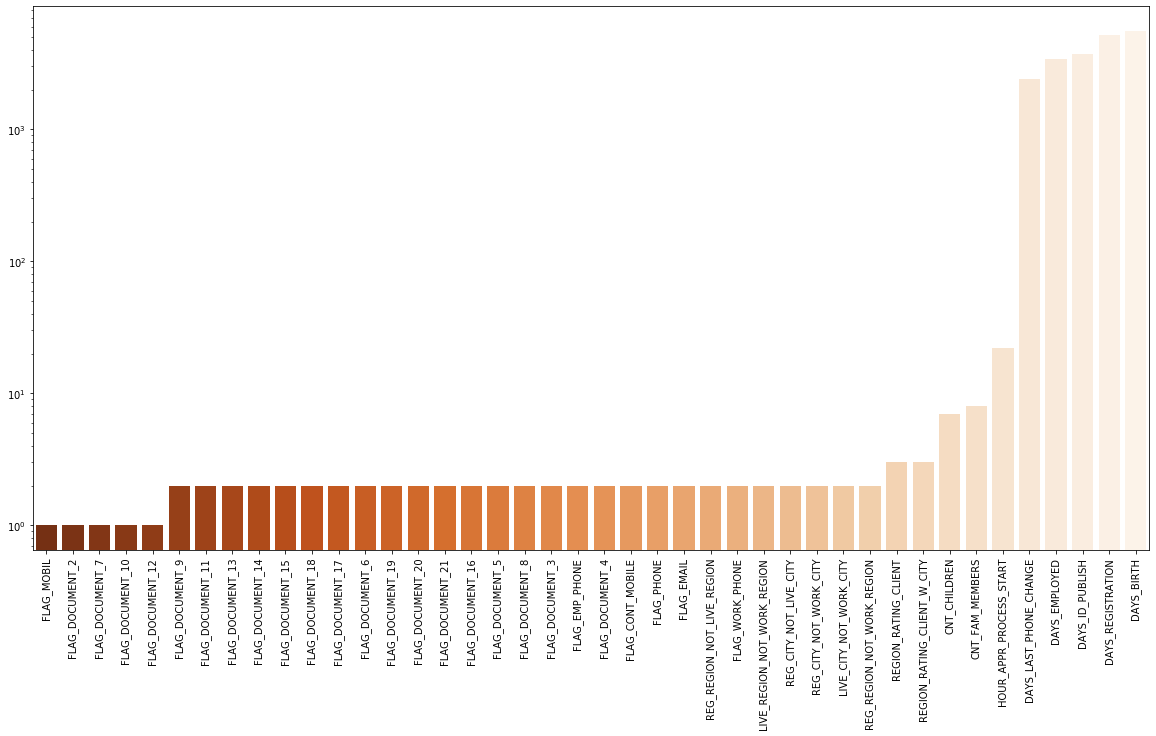

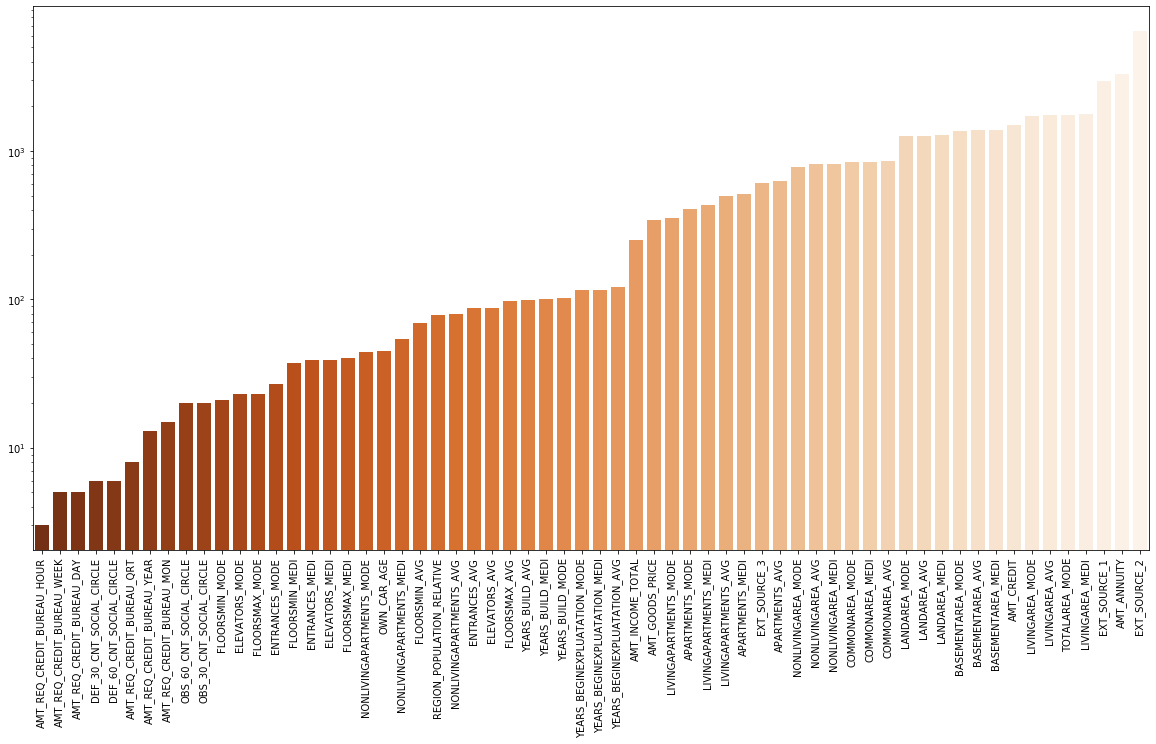

In [118]:
mypreprocessor.uniq_plot(obj_feat.keys())
mypreprocessor.uniq_plot(int_feat.keys())
mypreprocessor.uniq_plot(float_feat.keys())

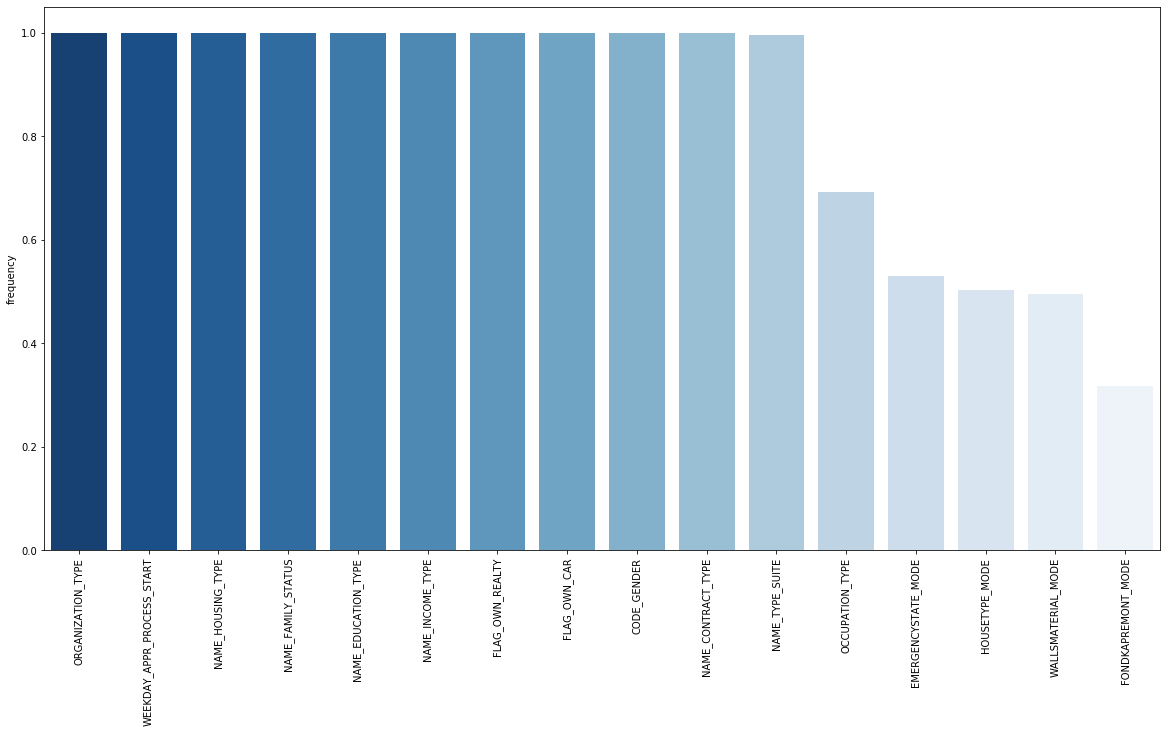

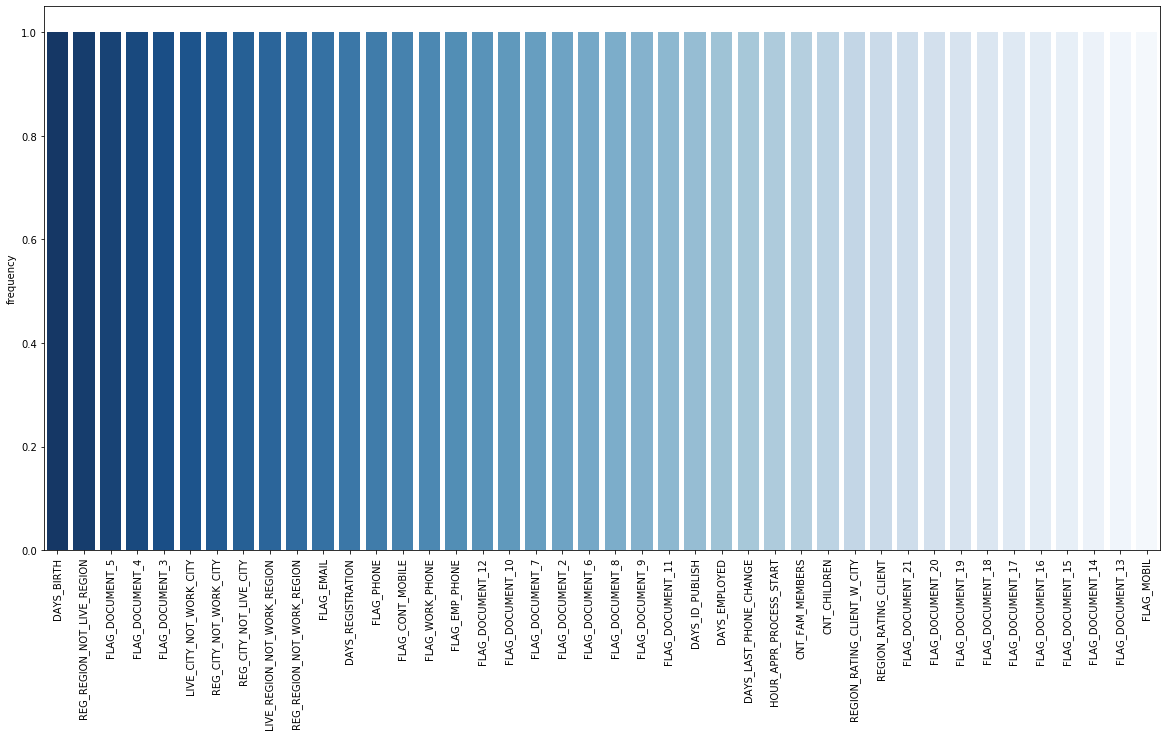

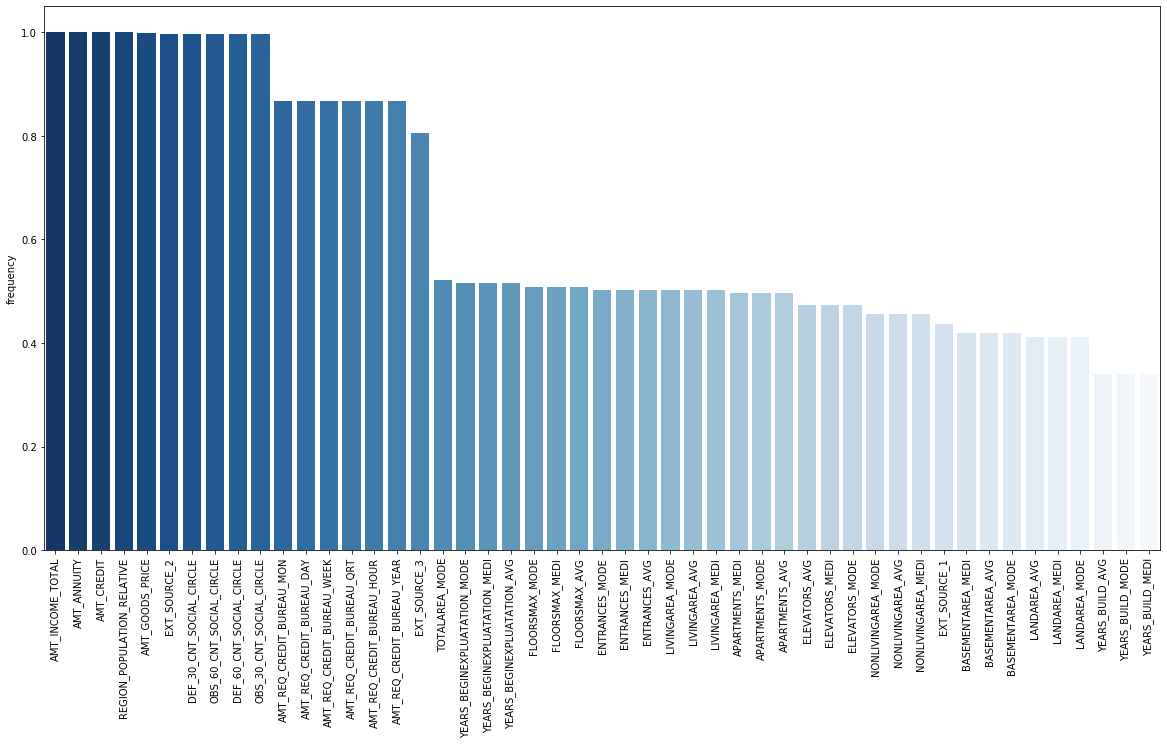

In [119]:
mypreprocessor.freq_plot(obj_feat.keys())
mypreprocessor.freq_plot(int_feat.keys())
mypreprocessor.freq_plot(float_feat.keys())